In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import cv2
import numpy as np

# 이미지 불러오기
img = cv2.imread('./images/20231101_112317.jpg')
img2 = img.copy()

# 이미지를 그레이스케일로 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 스레시홀드로 바이너리 이미지로 만들어서 검은배경에 흰색전경으로 반전
ret, imthres = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# 가장 바깥쪽 컨투어에 대해 모든 좌표 반환
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# 가장 바깥쪽 컨투어에 대해 꼭지점 좌표만 반환
contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 각각의 컨투의 갯수 출력
print('도형의 갯수: %d(%d)'% (len(contour), len(contour2)))

# 모든 좌표를 갖는 컨투어 그리기, 초록색
cv2.drawContours(img, contour, -1, (0,255,0), 4)
# 꼭지점 좌표만을 갖는 컨투어 그리기, 초록색
cv2.drawContours(img2, contour2, -1, (0,255,0), 4)

# 컨투어 모든 좌표를 작은 파랑색 점(원)으로 표시 ---⑧
for i in contour:
    for j in i:
        cv2.circle(img, tuple(j[0]), 1, (255,0,0), -1) 

# 컨투어 꼭지점 좌표를 작은 파랑색 점(원)으로 표시 ---⑨
for i in contour2:
    for j in i:
        cv2.circle(img2, tuple(j[0]), 1, (255,0,0), -1) 

# 결과 출력 ---⑩
cv2.imshow('CHAIN_APPROX_NONE', img)
cv2.imshow('CHAIN_APPROX_SIMPLE', img2)
cv2.imwrite('./images/CHAIN_APPROX_NONE.jpg', img)
cv2.imwrite('./images/CHAIN_APPROX_SIMPLE.jpg', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

도형의 갯수: 16041(16041)


In [2]:
img = cv2.imread('./images/arrow3.jpg')

In [3]:
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
ret, th = cv2.threshold(imgray, 180, 255, cv2.THRESH_BINARY_INV)

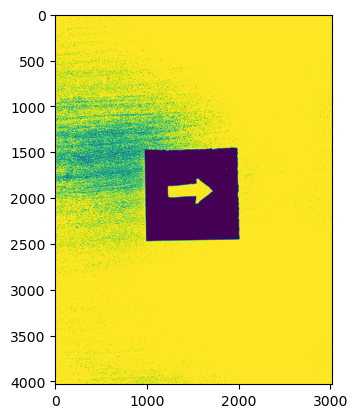

In [5]:
plt.imshow(th)

In [6]:
edges = cv2.Canny(th, 50, 150)

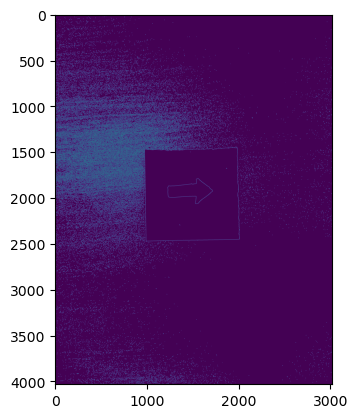

In [7]:
plt.imshow(edges)

In [8]:
cnts = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts

((array([[[1781, 4031]]], dtype=int32),
  array([[[1779, 4031]]], dtype=int32),
  array([[[1733, 4031]]], dtype=int32),
  array([[[1731, 4031]]], dtype=int32),
  array([[[1659, 4031]]], dtype=int32),
  array([[[1657, 4031]]], dtype=int32),
  array([[[1168, 4031]]], dtype=int32),
  array([[[1140, 4031]],
  
         [[1141, 4031]]], dtype=int32),
  array([[[ 949, 4031]]], dtype=int32),
  array([[[ 904, 4031]]], dtype=int32),
  array([[[ 902, 4031]]], dtype=int32),
  array([[[ 722, 4031]],
  
         [[ 723, 4031]]], dtype=int32),
  array([[[ 624, 4031]],
  
         [[ 625, 4031]]], dtype=int32),
  array([[[1638, 4030]],
  
         [[1637, 4031]],
  
         [[1638, 4030]],
  
         [[1639, 4031]]], dtype=int32),
  array([[[1101, 4030]],
  
         [[1100, 4031]],
  
         [[1101, 4030]],
  
         [[1102, 4031]]], dtype=int32),
  array([[[1019, 4030]],
  
         [[1018, 4031]],
  
         [[1019, 4030]],
  
         [[1020, 4031]]], dtype=int32),
  array([[[ 886, 4030]],

In [9]:
contours, hr = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [10]:
for i in range(len(cnts)):
    x,y,w,h = cv2.boundingRect(cnts[i])
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,0), 3)
        
    
    # (x,y), radius = cv2.minEnclosingCircle(contours[i])
    # if radius > 100:
    #     cv2.circle(img, (int(x), int(y)), int(radius), (255,0,0), 2)

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'boundingRect'
> Overload resolution failed:
>  - array is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'array'


In [118]:
cv2.imshow('Bound Fit shapes', img)
cv2.imwrite('./images/cnts3.jpg', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
x,y,w,h = cv2.boundingRect(contr)
cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,0), 3)

array([[[166, 161, 162],
        [168, 163, 164],
        [170, 165, 166],
        ...,
        [115, 109, 104],
        [116, 110, 105],
        [127, 121, 116]],

       [[167, 162, 163],
        [169, 164, 165],
        [171, 166, 167],
        ...,
        [121, 115, 110],
        [121, 115, 110],
        [128, 122, 117]],

       [[169, 164, 165],
        [170, 165, 166],
        [172, 167, 168],
        ...,
        [125, 119, 114],
        [121, 115, 110],
        [122, 116, 111]],

       ...,

       [[122, 117, 118],
        [133, 128, 129],
        [135, 130, 131],
        ...,
        [ 10,   7,   3],
        [  8,   5,   1],
        [  6,   3,   0]],

       [[123, 118, 119],
        [132, 127, 128],
        [130, 125, 126],
        ...,
        [ 10,   7,   3],
        [  7,   4,   0],
        [  5,   2,   0]],

       [[126, 121, 122],
        [131, 126, 127],
        [125, 120, 121],
        ...,
        [ 10,   7,   3],
        [  7,   4,   0],
        [  4,   1,   0]]

In [34]:
import cv2
import numpy as np

# 이미지 읽어서 그레이스케일 변환, 바이너리 스케일 변환
img = cv2.imread('./images/arrow2.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127,255,cv2.THRESH_BINARY_INV)

# 컨튜어 찾기
contours, hr = cv2.findContours(th, cv2.RETR_EXTERNAL, \
                                        cv2.CHAIN_APPROX_SIMPLE)
contr = contours[0]

# 감싸는 사각형 표시(검정색)
x,y,w,h = cv2.boundingRect(contr)
cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,0), 3)

# 최소한의 사각형 표시(초록색)
rect = cv2.minAreaRect(contr)
box = cv2.boxPoints(rect)   # 중심점과 각도를 4개의 꼭지점 좌표로 변환
box = np.int0(box)          # 정수로 변환
cv2.drawContours(img, [box], -1, (0,255,0), 3)

# 최소한의 원 표시(파랑색)
(x,y), radius = cv2.minEnclosingCircle(contr)
cv2.circle(img, (int(x), int(y)), int(radius), (255,0,0), 2)

# 최소한의 삼각형 표시(분홍색)
ret, tri = cv2.minEnclosingTriangle(contr)
cv2.polylines(img, [np.int32(tri)], True, (255,0,255), 2)

# 최소한의 타원 표시(노랑색)
# ellipse = cv2.fitEllipse(contr)
# cv2.ellipse(img, ellipse, (0,255,255), 3)

# 중심점 통과하는 직선 표시(빨강색)
# [vx,vy,x,y] = cv2.fitLine(contr, cv2.DIST_L2,0,0.01,0.01)
# cols,rows = img.shape[:2]
# cv2.line(img,(0, 0-x*(vy/vx) + y), (cols-1, (cols-x)*(vy/vx) + y), \
#                                                         (0,0,255),2)

# 결과 출력
cv2.imshow('Bound Fit shapes', img)
cv2.imwrite('./images/Bound.jpg', img)
cv2.waitKey(0)
cv2.destroyAllWindows()